In [1]:
import pandas as pd
df = pd.read_csv('saldataset.csv')
print(df.head())
print(df.info())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('saldataset.csv')

# 1. Handle Missing Values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Impute missing values with the mode for object columns
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mode()[0])


# 2. Prepare Data for Modeling
# Define features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income'].astype(str).apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# 3. Create a Preprocessing Pipeline
# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# 4. Define the Gradient Boosting Model
# We are replacing LogisticRegression with GradientBoostingClassifier
# n_estimators=100 and learning_rate=0.1 are common starting points
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 5. Create and Evaluate the Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
print("Training the Gradient Boosting model... (This may take a moment)")
pipeline.fit(X_train, y_train)
print("Training complete.")

# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.4f}")

# 6. Save the new pipeline (preprocessor + model) and the columns
joblib.dump(pipeline, 'salary_prediction_pipeline.pkl')
print("New pipeline saved as 'salary_prediction_pipeline.pkl'")

# The processed columns file will be the same, but we can save it again for completeness
processed_columns = numerical_features.tolist() + \
                    pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

with open('processed_columns.txt', 'w') as f:
    for col in processed_columns:
        f.write(col + '\n')

print("Processed column names saved to 'processed_columns.txt'")

Training the Gradient Boosting model... (This may take a moment)
Training complete.
Gradient Boosting Model Accuracy: 0.8722
New pipeline saved as 'salary_prediction_pipeline.pkl'
Processed column names saved to 'processed_columns.txt'


/tmp/ipython-input-3-3819136537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='viridis', order=df['income'].value_counts().index)


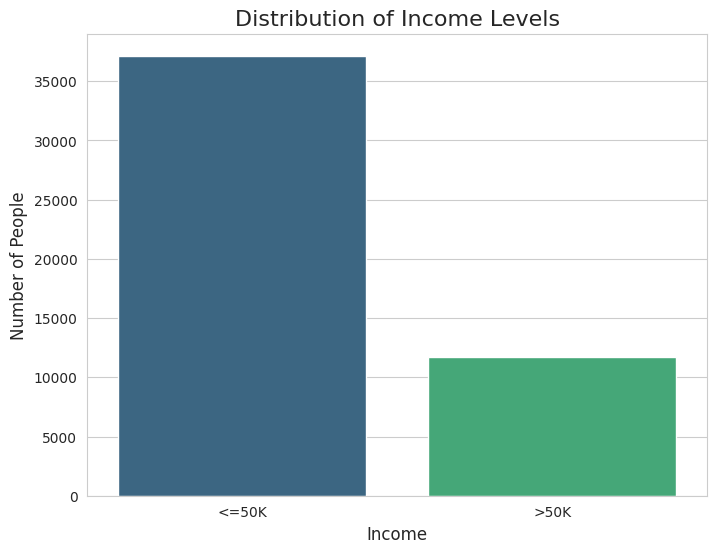

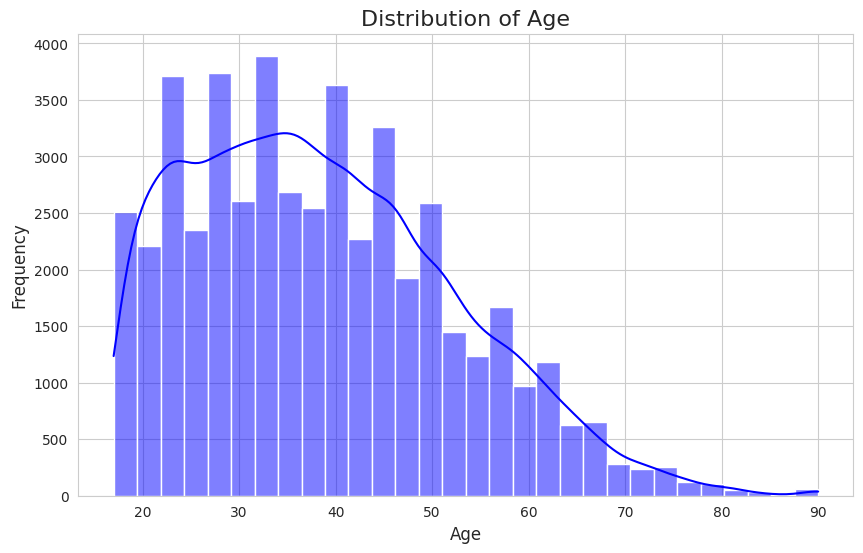

/tmp/ipython-input-3-3819136537.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, palette='plasma', order=df['education'].value_counts().index)


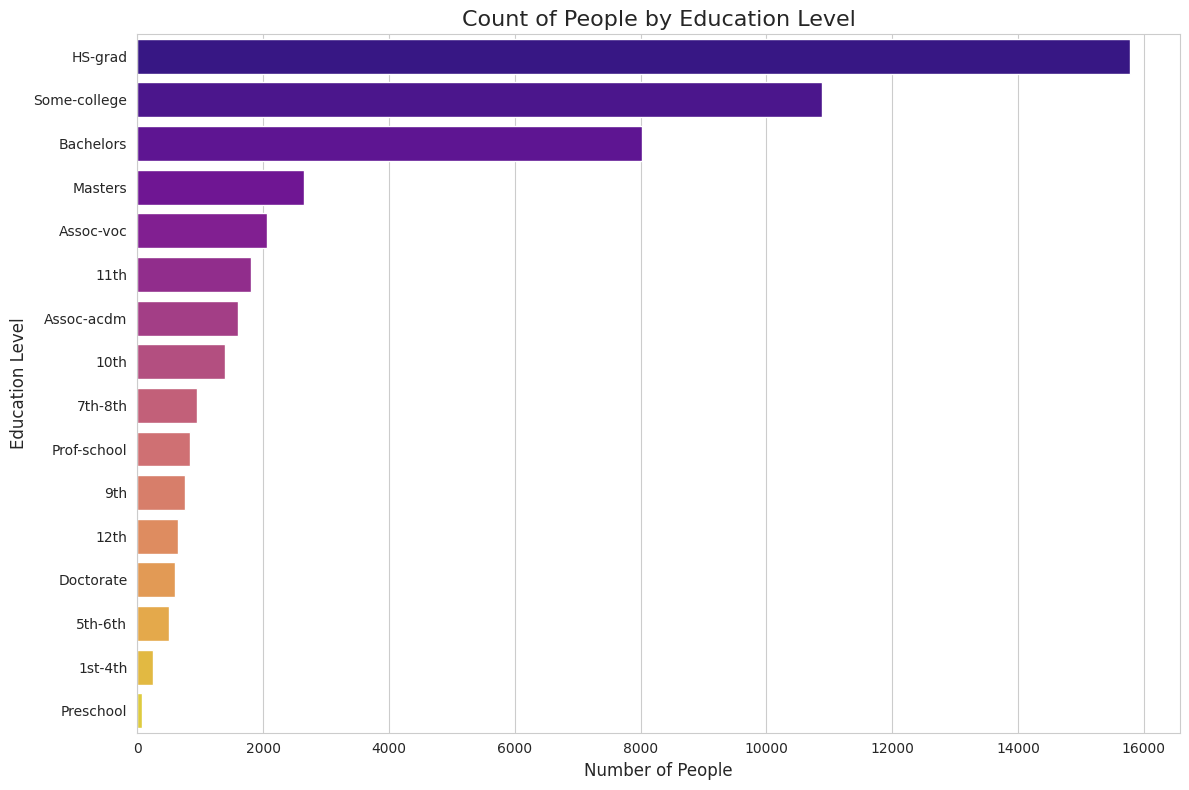

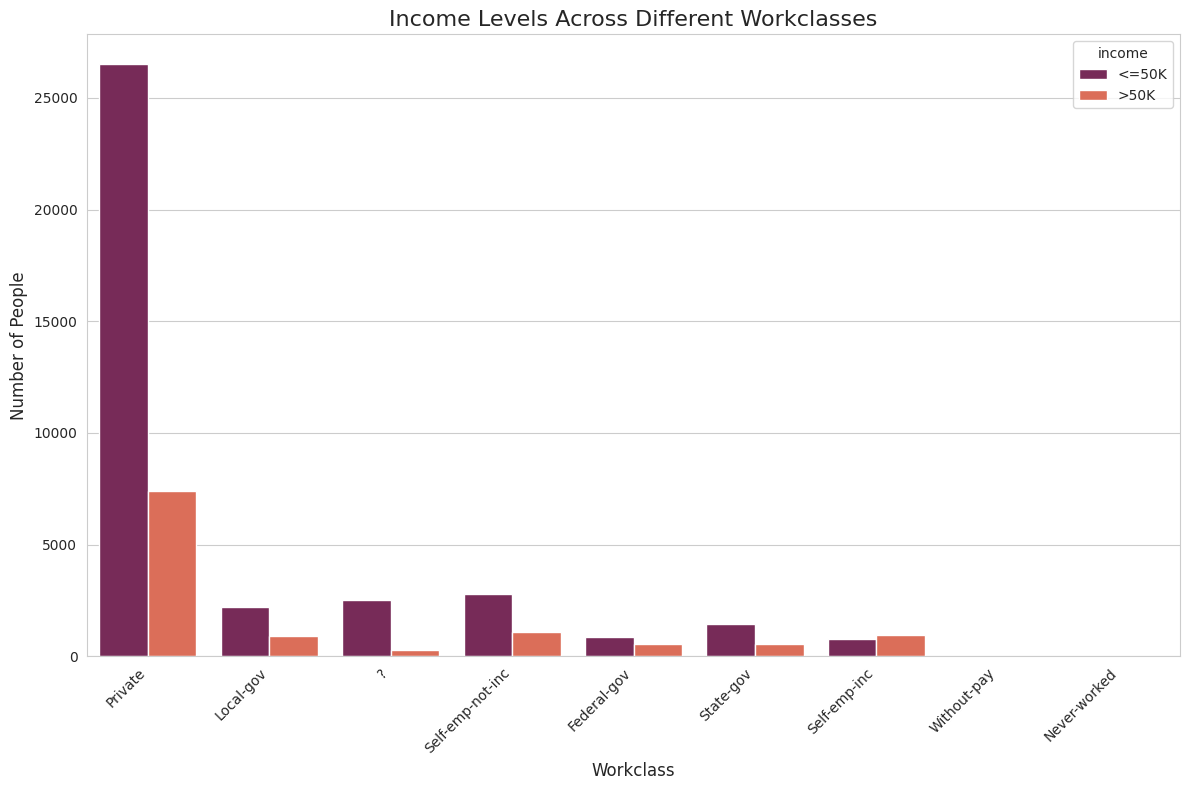

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style for the plots
sns.set_style("whitegrid")

# Load the dataset from the uploaded file
try:
    df = pd.read_csv('saldataset.csv')
except FileNotFoundError:
    print("Error: saldataset.csv not found. Please upload the file to your Colab environment.")
    df = pd.DataFrame() # Create an empty dataframe to prevent further errors

if not df.empty:
    # --- Plot 1: Income Distribution ---
    plt.figure(figsize=(8, 6))
    sns.countplot(x='income', data=df, palette='viridis', order=df['income'].value_counts().index)
    plt.title('Distribution of Income Levels', fontsize=16)
    plt.xlabel('Income', fontsize=12)
    plt.ylabel('Number of People', fontsize=12)
    plt.show() # This command displays the plot

    # --- Plot 2: Age Distribution ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df['age'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Age', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # --- Plot 3: Education Level Count ---
    plt.figure(figsize=(12, 8))
    sns.countplot(y='education', data=df, palette='plasma', order=df['education'].value_counts().index)
    plt.title('Count of People by Education Level', fontsize=16)
    plt.xlabel('Number of People', fontsize=12)
    plt.ylabel('Education Level', fontsize=12)
    plt.tight_layout()
    plt.show()

    # --- Plot 4: Income by Workclass ---
    plt.figure(figsize=(12, 8))
    sns.countplot(x='workclass', hue='income', data=df, palette='rocket')
    plt.title('Income Levels Across Different Workclasses', fontsize=16)
    plt.xlabel('Workclass', fontsize=12)
    plt.ylabel('Number of People', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [4]:
!pip install streamlit
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [5]:

!pip install pyngrok -q

In [6]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# --- PAGE CONFIGURATION ---
st.set_page_config(
    page_title="Salary AI",
    page_icon="🤖",
    layout="centered", # Centered layout for a cleaner look
    initial_sidebar_state="collapsed",
)

# --- LOAD THE MODEL ---
try:
    pipeline = joblib.load('salary_prediction_pipeline.pkl')
except FileNotFoundError:
    st.error("Model file 'gradient_boosting_pipeline.pkl' not found. Please ensure it's in the same directory.")
    st.stop()


# --- CUSTOM CSS FOR STYLING ---
st.markdown("""
<style>
    /* General Body Style */
    body {
        background-color: #f0f2f6;
    }

    /* Main Title */
    .title {
        font-size: 3rem;
        font-weight: bold;
        text-align: center;
        color: #1a1a1a;
        padding: 20px 0;
    }

    /* Subtitle / Description */
    .description {
        text-align: center;
        color: #555;
        font-size: 1.1rem;
        margin-bottom: 40px;
    }

    /* Input Card Style */
    .st-emotion-cache-z5fcl4 { /* This is the class for the main container */
        border-radius: 15px;
        padding: 25px !important;
        background-color: #ffffff;
        box-shadow: 0 4px 12px rgba(0,0,0,0.1);
        border: 1px solid #e6e6e6;
    }

    /* Input Labels */
    .st-emotion-cache-ue6cfb { /* This is the class for the input labels */
        font-weight: 500;
        color: #333;
    }

    /* Prediction Button Style */
    .stButton>button {
        border-radius: 10px;
        border: none;
        padding: 15px 30px;
        font-size: 1.2rem;
        font-weight: bold;
        color: white;
        background: linear-gradient(90deg, #6a11cb 0%, #2575fc 100%);
        width: 100%;
        margin-top: 20px;
    }
    .stButton>button:hover {
        opacity: 0.9;
        color: white;
    }

    /* Result Card Styles */
    .result-card {
        border-radius: 15px;
        padding: 25px;
        text-align: center;
        margin-top: 30px;
        box-shadow: 0 4px 12px rgba(0,0,0,0.1);
    }
    .result-card-gt50k {
        background-color: #e8f5e9; /* Light Green */
        border: 1px solid #4caf50;
    }
    .result-card-le50k {
        background-color: #ffebee; /* Light Red */
        border: 1px solid #f44336;
    }
    .result-text {
        font-size: 2rem;
        font-weight: bold;
    }
    .result-text-gt50k {
        color: #2e7d32; /* Dark Green */
    }
    .result-text-le50k {
        color: #c62828; /* Dark Red */
    }
    .confidence-text {
        font-size: 1.1rem;
        color: #555;
    }
</style>
""", unsafe_allow_html=True)


# --- APP HEADER ---
st.markdown("<p class='title'>Salary AI Predictor</p>", unsafe_allow_html=True)
st.markdown("<p class='description'>Enter an employee's profile below and the AI will predict their income bracket.</p>", unsafe_allow_html=True)


# --- INPUT FORM ---
with st.container():
    st.subheader("📝 Employee Details")

    # Create columns for a structured layout
    col1, col2 = st.columns(2)

    with col1:
        age = st.number_input('Age', min_value=17, max_value=90, value=35)
        workclass = st.selectbox('🏢 Workclass', ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay'])
        education = st.selectbox('🎓 Education', ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'])
        occupation = st.selectbox('💼 Occupation', ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'])

    with col2:
        hours_per_week = st.number_input('Hours per Week', min_value=1, max_value=99, value=40)
        marital_status = st.selectbox('💍 Marital Status', ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])
        gender = st.selectbox('🚻 Gender', ['Male', 'Female'])
        native_country = st.selectbox('🌍 Native Country', ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Other']) # Simplified for UI

    # Hidden default values for simplicity
    input_dict = {
        'age': age, 'workclass': workclass, 'fnlwgt': 189778, 'education': education,
        'educational-num': 9, 'marital-status': marital_status, 'occupation': occupation,
        'relationship': 'Not-in-family', 'race': 'White', 'gender': gender, 'capital-gain': 0,
        'capital-loss': 0, 'hours-per-week': hours_per_week, 'native-country': native_country
    }
    input_data = pd.DataFrame([input_dict])


# --- PREDICTION BUTTON AND RESULT ---
if st.button('✨ Predict Salary'):
    with st.spinner('AI is analyzing the profile...'):
        prediction = pipeline.predict(input_data)[0]
        prediction_proba = pipeline.predict_proba(input_data)[0]

    if prediction == 1:
        prob = prediction_proba[1] * 100
        st.markdown(f"""
        <div class="result-card result-card-gt50k">
            <p class="result-text result-text-gt50k">Predicted Income: >$50K</p>
            <p class="confidence-text">Confidence: {prob:.2f}%</p>
        </div>
        """, unsafe_allow_html=True)
    else:
        prob = prediction_proba[0] * 100
        st.markdown(f"""
        <div class="result-card result-card-le50k">
            <p class="result-text result-text-le50k">Predicted Income: &lt;=$50K</p>
            <p class="confidence-text">Confidence: {prob:.2f}%</p>
        </div>
        """, unsafe_allow_html=True)

Writing app.py


In [8]:
from pyngrok import ngrok

# Terminate open tunnels if any
ngrok.kill()

# Set your ngrok authtoken
NGROK_AUTH_TOKEN = "2tE7n8T5IHKQthDn8hU72revmhC_3rrAaLgY5DExnwftFLzod"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTP tunnel to the Streamlit port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit App URL: {public_url}")

# Run the Streamlit app
!streamlit run app.py

Streamlit App URL: NgrokTunnel: "https://2b5905df8a0c.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.1.124:8501

  Stopping...
